In [1]:
# Import Packages

import os
import numpy as np
import spectral.io.envi as envi
from spectral import *

ImageView object:
  Display bands       :  (59, 26, 1)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 18543.0]
    G: [0.0, 16348.0]
    B: [0.0, 23111.0]

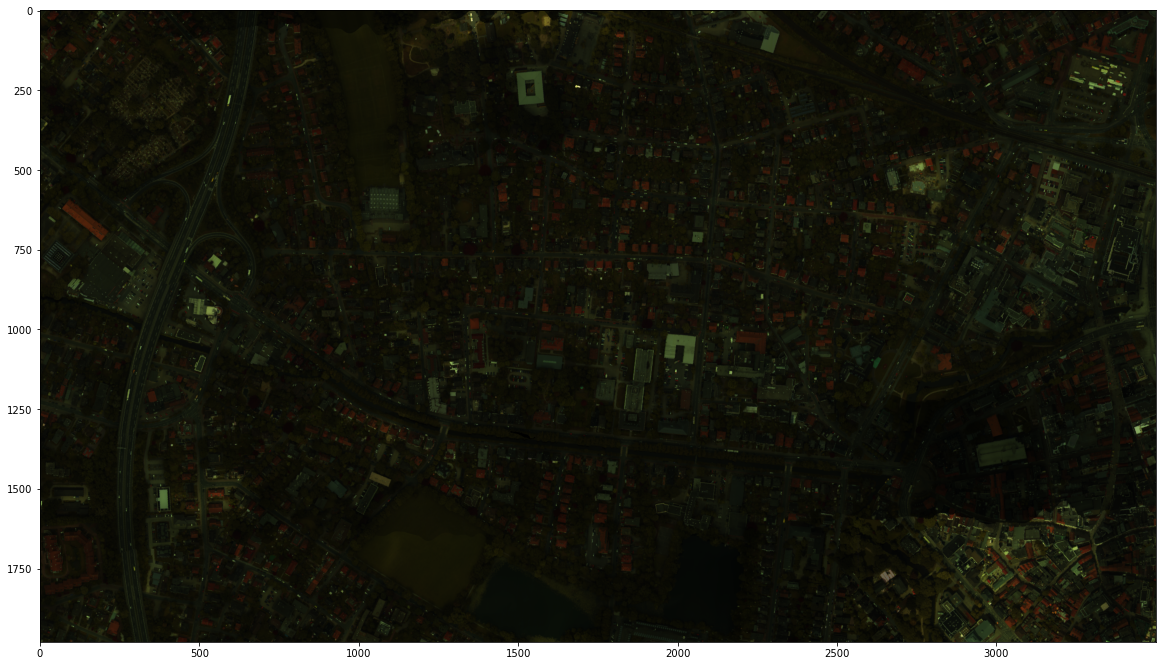

In [2]:
from Daten_einlesen.find_path_nextcloud import find_path_nextcloud

path_nextcloud = find_path_nextcloud()
path_hdr = path_nextcloud + "Daten_Gyrocopter/Zusammengefuehrte_Daten/Oldenburg_combined.hdr"
path_dat = path_nextcloud + "Daten_Gyrocopter/Zusammengefuehrte_Daten/Oldenburg_combined.dat"

# Zusammengeführtes Bild öffnen
img_original = envi.open(file=path_hdr, image=path_dat)
imshow(img_original, bands=(59,26,1), figsize=(20,20))

In [3]:
#festlegen welches Grid zusammengelegt werden soll
windowsize_r=500
windowsize_c=500

In [4]:
grid_folder=path_nextcloud + "Daten_Gyrocopter/Teilbilder_Oldenburg/grid_"+str(windowsize_r)+"_"+str(windowsize_c)

path= grid_folder+'/grid_image.hdr'

# leere Envi Bild in den Zieldimensionen erstellen
grid=envi.create_image(hdr_file = path,metadata=img_original.metadata,dtype = "float32", ext = '.dat', interleave = 'bsq', force = True)
# Zugriff auf Bild Matrix erstellen
writer=grid.open_memmap(writable=True)


In [5]:
#liste aller Dateien in Gridordner erstellen
files = os.listdir(grid_folder)

#Aus Liste files .hdr dateien löschen
for file in files:
    if file.endswith('.hdr'):
        files.remove(file)

#Alte grid Dateien aus Liste entfernen
for file in files:
    if 'grid' in file:
        files.remove(file)

# Teilbilder über writer in grid zusammenführen
for file in files:
    # aufgrund definierter Namenskonvention kann je Datei die Gridposition berechent werden
    file_split=file.split('_')
    grid_pos_r=int(file_split[2])*windowsize_r #Gridposition row
    grid_pos_c=int(file_split[3])*windowsize_c #Gridposition column


    path_hdr=grid_folder+"/"+file[:-4]+'.hdr'
    path_dat=grid_folder+"/"+file

    #Teilbild laden
    image_small=envi.open(file=path_hdr, image=path_dat)
    #Teilbild in Grid einfügen
    writer[grid_pos_r:grid_pos_r+windowsize_r,grid_pos_c:grid_pos_c+windowsize_c,:]=image_small.open_memmap(writable=False)

Erfolgreich: Image_grid entspricht Image_original.
Image vor Split vs nach Split


ImageView object:
  Display bands       :  (59, 26, 1)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 18543.0]
    G: [0.0, 16348.0]
    B: [0.0, 23111.0]

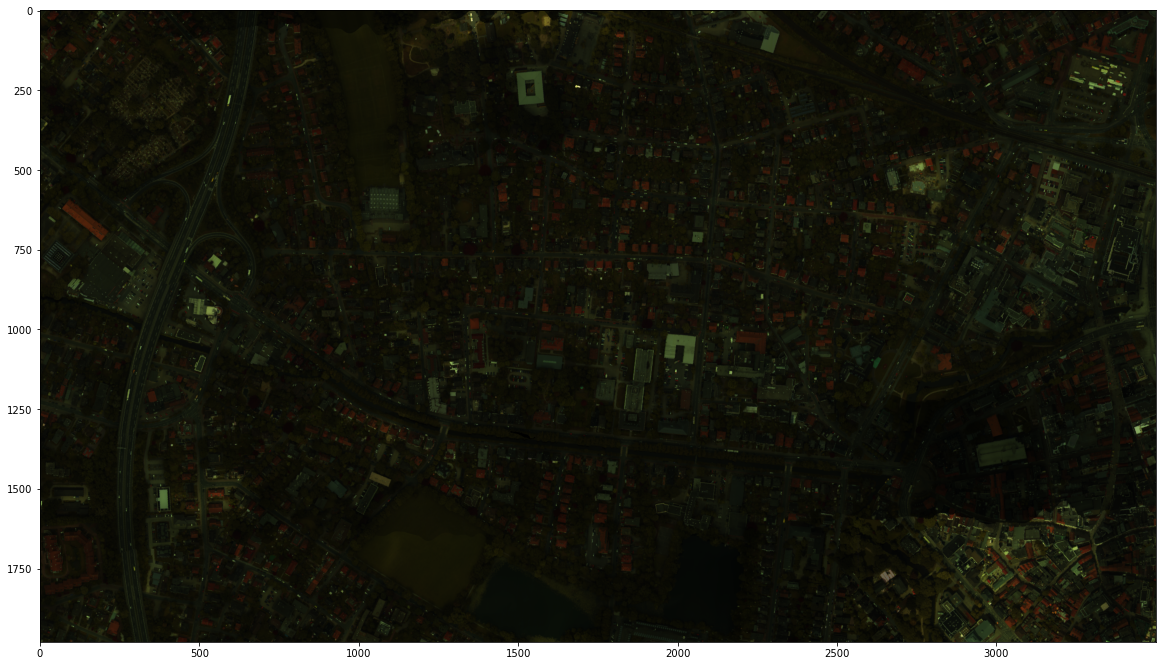

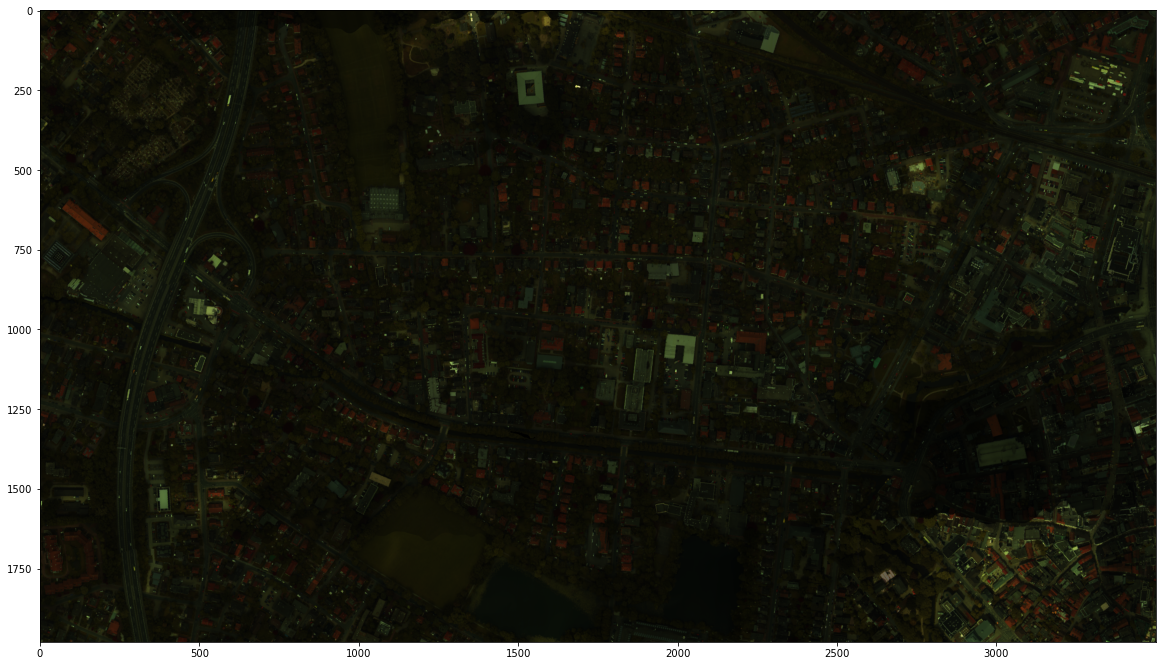

In [6]:
# Vergleich ob Originalbild == Gridbild

# Originalbild laden
path_hdr = path_nextcloud + "Daten_Gyrocopter/Zusammengefuehrte_Daten/Oldenburg_combined.hdr"
path_dat = path_nextcloud + "Daten_Gyrocopter/Zusammengefuehrte_Daten/Oldenburg_combined.dat"
img_original = envi.open(file=path_hdr, image=path_dat)
img_original=img_original.open_memmap(writable=False)

#Gridbild laden
path_hdr = path_nextcloud + "Daten_Gyrocopter/Teilbilder_Oldenburg/grid_500_500/grid_image.hdr"
path_dat = path_nextcloud + "Daten_Gyrocopter/Teilbilder_Oldenburg/grid_500_500/grid_image.dat"
img_grid = envi.open(file=path_hdr, image=path_dat)
img_grid_data=img_grid.open_memmap(writable=False)

# Vergleich Originalbild zu Gridbild
if np.all(img_grid_data == img_original):
    # Bilder identisch
    print("Erfolgreich: Image_grid entspricht Image_original.")
else:
    # Bilder nicht identisch
    print("Fehler: Image_grid entspricht nicht Image_original!!!")
print("Image vor Split vs nach Split")

#Bilder ausgeben
imshow(img_original, bands=(59,26,1), figsize=(20,20))
imshow(img_grid, bands=(59,26,1), figsize=(20,20))